In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
import urllib.request
def download(url, filename):
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename}")

In [5]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [6]:
download(filepath, "insurance.csv")
file_name="insurance.csv"

Downloaded insurance.csv


In [17]:
# df = pd.read_csv(file_name)
# df1 = pd.read_csv(file_name,header=None)
# print('df:', df.head())
# print('df1:', df1.head())
df = pd.read_csv(file_name,header=None)

TASK1: import dataset

In [18]:
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [19]:
header = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = header
print(df.head(5))

  age  gender     bmi  no_of_children smoker  region      charges
0  19       1  27.900               0      1       3  16884.92400
1  18       2  33.770               1      0       4   1725.55230
2  28       2  33.000               3      0       4   4449.46200
3  33       2  22.705               0      0       1  21984.47061
4  32       2  28.880               0      0       1   3866.85520


Replace the "?" entries with "NaN" values.

In [21]:
df.replace('?', np.nan, inplace=True)

TASK2: data wrangling

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


- For continuous attributes (e.g., age), replace missing values with the mean. 
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value. 
- Update the data types of the respective columns. 
- Verify the update using `df.info()`.

In [24]:
# smoke is a categotical attibute, replace missing  values 
# with the most frequent value
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)


In [25]:
# age is a continous attribute, replace missing values with mean age
mean_age = df['age'].astype('float').mean()
df['age'].replace(np.nan, mean_age, inplace=True)

In [26]:
df[['age','smoker']] = df[['age','smoker']].astype('int')

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


TASK3: Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`.

(0.0, 66902.8557155)

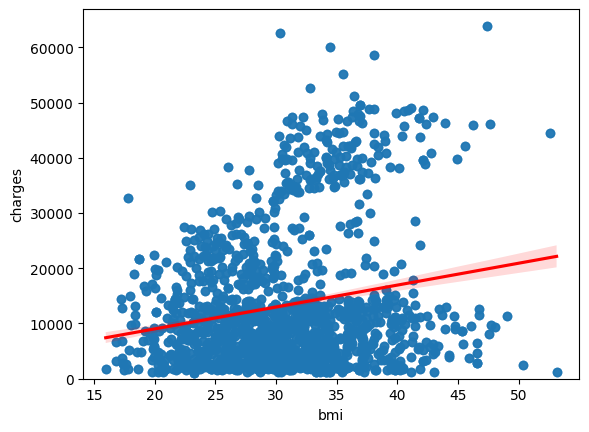

In [37]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={"color":"r"})
plt.ylim(0,)

In [38]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


TASK4 : Model Development

In [39]:
X = df[['smoker']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.6221791718835359


In [40]:
Z = df[['age','gender','bmi','no_of_children','smoker','region']]
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.7504083816310174


/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


In [42]:
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]
pipe = Pipeline(Input)

Z= Z.astype('float')
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8452576157336337


/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


Task 5 : Model Refinement

In [43]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [44]:
RidgeModel= Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6760807753399253


/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
